In [29]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Dostop do datoteke
file_path = '../PrometneNesreče.csv'
data = pd.read_csv(file_path)

C:\Users\Hana\AppData\Local\Temp\ipykernel_32336\2677043888.py:3: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [17]:
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

day_translation = {
    'Monday': 'Ponedeljek',
    'Tuesday': 'Torek',
    'Wednesday': 'Sreda',
    'Thursday': 'Četrtek',
    'Friday': 'Petek',
    'Saturday': 'Sobota',
    'Sunday': 'Nedelja'
}
day_order_slo = ['Ponedeljek', 'Torek', 'Sreda', 'Četrtek', 'Petek', 'Sobota', 'Nedelja']

month_translation = {
    'January': 'Januar', 'February': 'Februar', 'March': 'Marec',
    'April': 'April', 'May': 'Maj', 'June': 'Junij',
    'July': 'Julij', 'August': 'Avgust', 'September': 'September',
    'October': 'Oktober', 'November': 'November', 'December': 'December'
}
month_order_slo = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']

data['Day_EN'] = data['NastanekDatumCas'].dt.day_name()
data['Day_SLO'] = data['Day_EN'].map(day_translation)

data['Mesec_EN'] = data['NastanekDatumCas'].dt.month_name()
data['Mesec_SLO'] = data['Mesec_EN'].map(month_translation)

data['Datum'] = data['NastanekDatumCas'].dt.date
data['Ura'] = data['NastanekDatumCas'].dt.hour

data['Teden'] = data['NastanekDatumCas'].dt.to_period('W').apply(lambda r: r.start_time)

data['Leto'] = data['NastanekDatumCas'].dt.year

# Severity
conditions = [
    (data['LjudjePoskodovani'] == 0) & (data['LjudjeMrtvi'] == 0),
    (data['LjudjePoskodovani'] != 0) & (data['LjudjeMrtvi'] == 0),
    (data['LjudjeMrtvi'] != 0)
]

# Določi oznake
severity_labels = ['no_injury', 'injury', 'death']

# Dodaj stolpec za severity
data['Severity'] = np.select(conditions, severity_labels, default='unknown')
# display(data)

# Število nesreč po mesecih

In [44]:
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

# Za vsak vnos pridobi, kateri mesec je bil
months = data['NastanekDatumCas'].dt.month

# Preštej število nesreč za vsak mesec
accidents_per_month = months.value_counts().sort_index()

print(accidents_per_month)

NastanekDatumCas
1     2248
2     2081
3     2349
4     2305
5     2945
6     3445
7     3358
8     3378
9     3213
10    3007
11    2463
12    2807
Name: count, dtype: int64


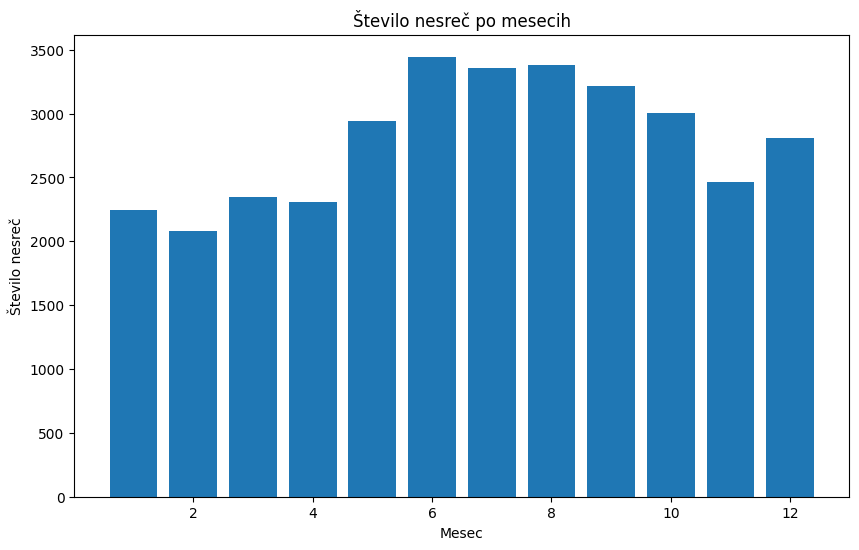

In [4]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_month.index, accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč po mesecih')

plt.show()

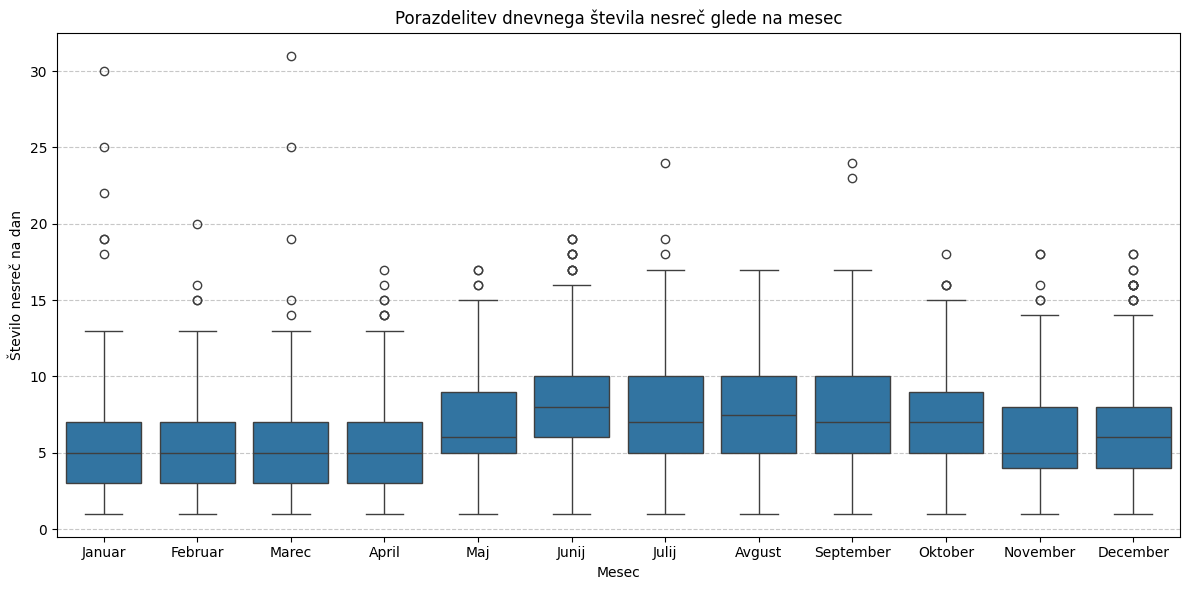

In [39]:
# BOXPLOT
# Najprej grupiram in preštejem nesreče
grouped = data.groupby(['Datum', 'Mesec_SLO']).size()

# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')
# display(df_accidents)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Mesec_SLO', y='accident_count', order=month_order_slo)
plt.title('Porazdelitev dnevnega števila nesreč glede na mesec')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Resnost posledic prometnih nesreč**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

## Nesreče brez poškodovancev

In [5]:
# Nesreče brez poškodovancev in smrtnih žrtev
mild_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] == 0)]

# Za vsak vnos pridobi mesec nesreče
mild_months = mild_accidents_entries['NastanekDatumCas'].dt.month

mild_accidents_per_month = mild_months.value_counts().sort_index()

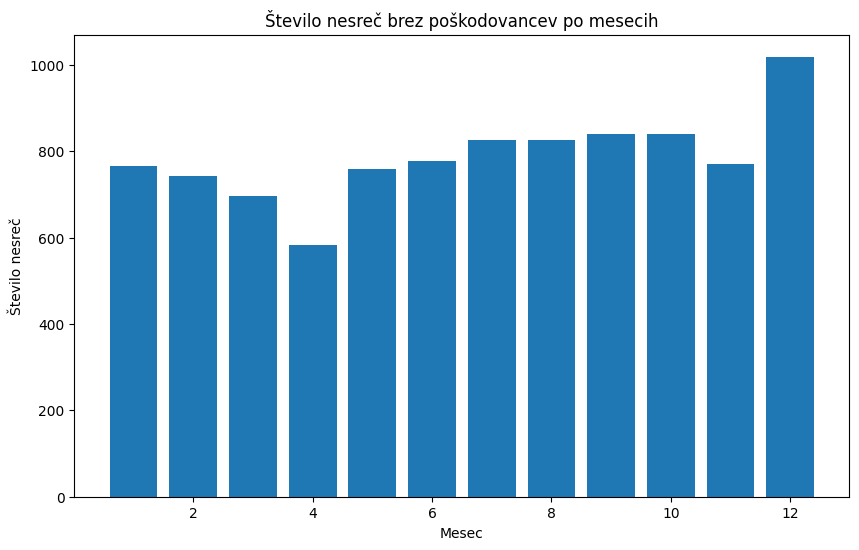

In [6]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(mild_accidents_per_month.index, mild_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč brez poškodovancev po mesecih')

plt.show()

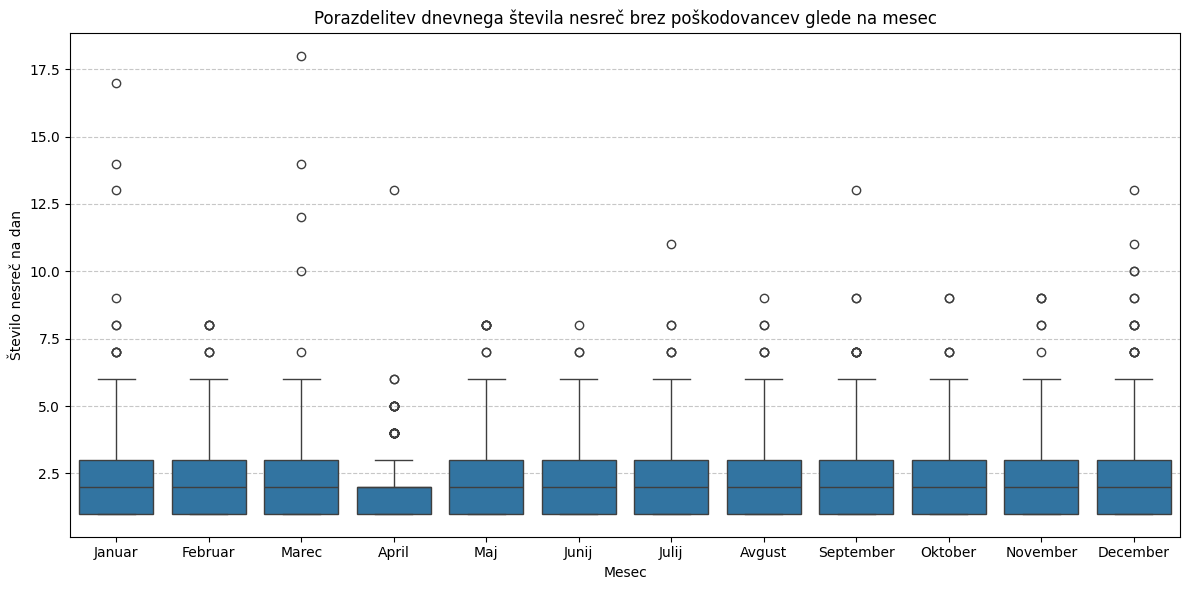

In [40]:
# BOXPLOT
mask_no_injury = (data['Severity'] == 'no_injury')
df_no_injury = data[mask_no_injury]

# Najprej grupiram in preštejem nesreče
grouped = df_no_injury.groupby(['Datum', 'Mesec_SLO']).size()

# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')
# display(df_accidents)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Mesec_SLO', y='accident_count', order=month_order_slo)
plt.title('Porazdelitev dnevnega števila nesreč brez poškodovancev glede na mesec')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Nesreče s poškodbami

In [7]:
# Nesreče s poškodbami
injury_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] != 0)]

# Za vsak vnos pridobi mesec nesreče
injury_months = injury_accidents_entries['NastanekDatumCas'].dt.month

injury_accidents_per_month = injury_months.value_counts().sort_index()

Text(0.5, 1.0, 'Število nesreč s poškodbami po mesecih')

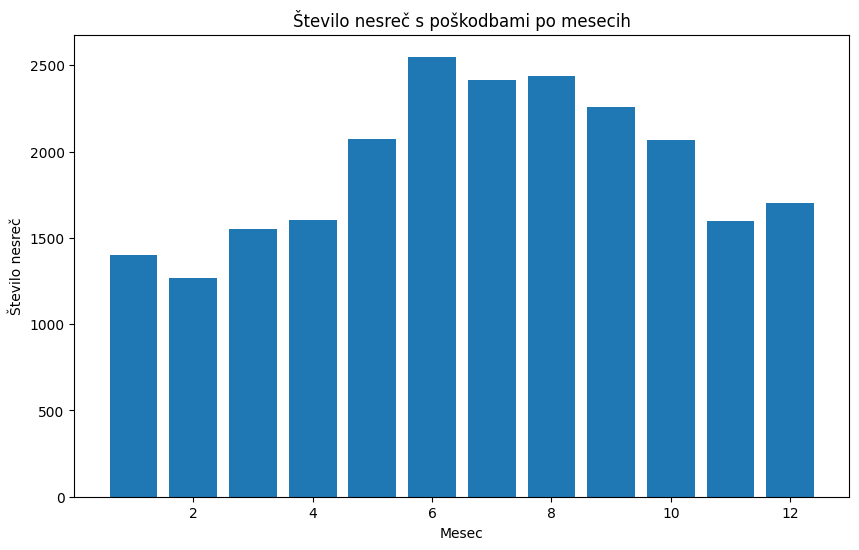

In [8]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(injury_accidents_per_month.index, injury_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s poškodbami po mesecih')

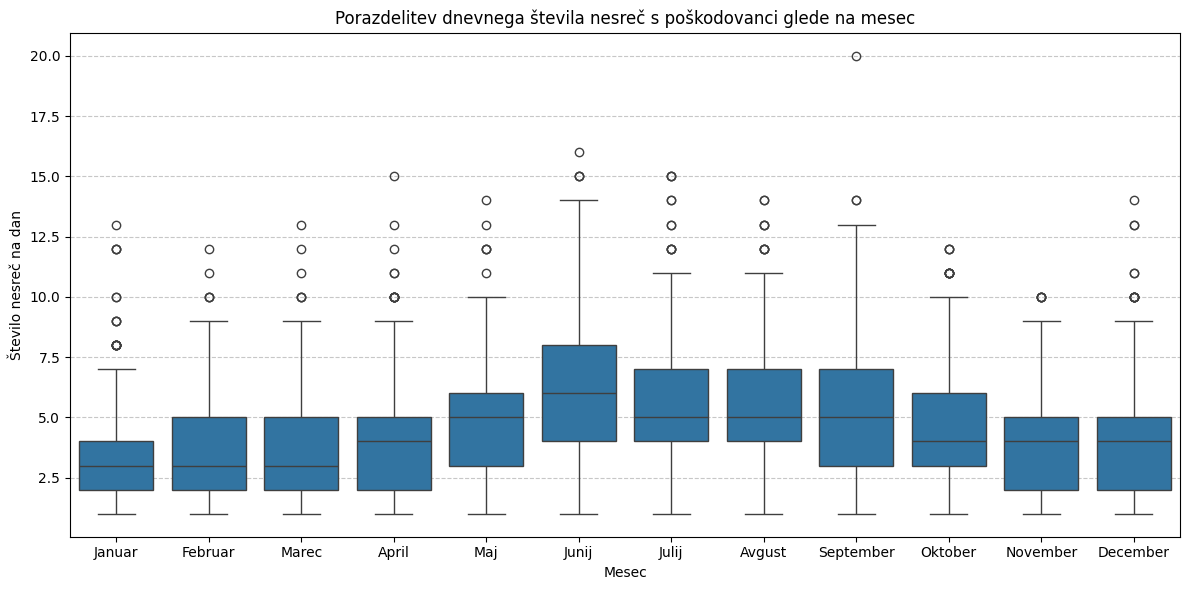

In [41]:
# BOXPLOT
mask_injury = (data['Severity'] == 'injury')
df_injury = data[mask_injury]

# Najprej grupiram in preštejem nesreče
grouped = df_injury.groupby(['Datum', 'Mesec_SLO']).size()

# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')
# display(df_accidents)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Mesec_SLO', y='accident_count', order=month_order_slo)
plt.title('Porazdelitev dnevnega števila nesreč s poškodovanci glede na mesec')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Nesreče s smrtnim izidom

In [9]:
# Nesreče s smrtnimi žrtvami
death_accidents_entries = data[(data['LjudjeMrtvi'] != 0)]

# Za vsak vnos pridobi mesec nesreče
death_months = death_accidents_entries['NastanekDatumCas'].dt.month

death_accidents_per_month = death_months.value_counts().sort_index()

Text(0.5, 1.0, 'Število nesreč s smrtnimi žrtvami po mesecih')

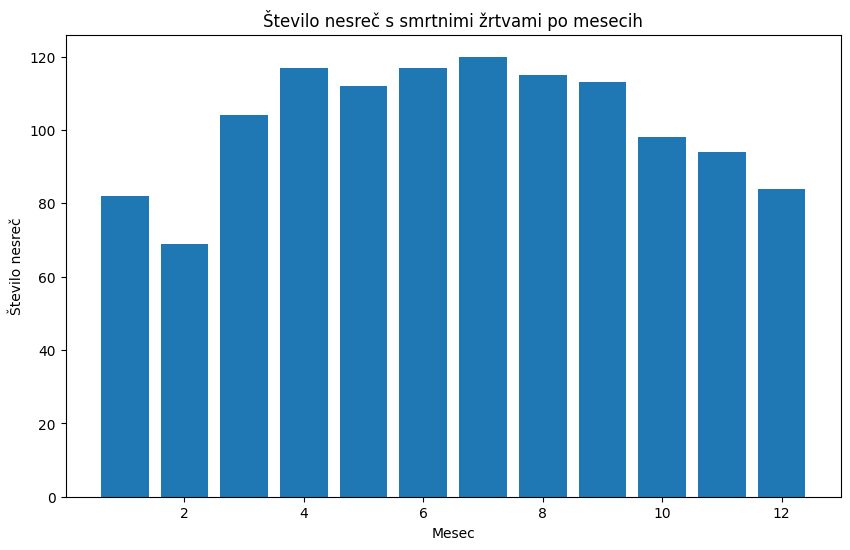

In [10]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(death_accidents_per_month.index, death_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnimi žrtvami po mesecih')

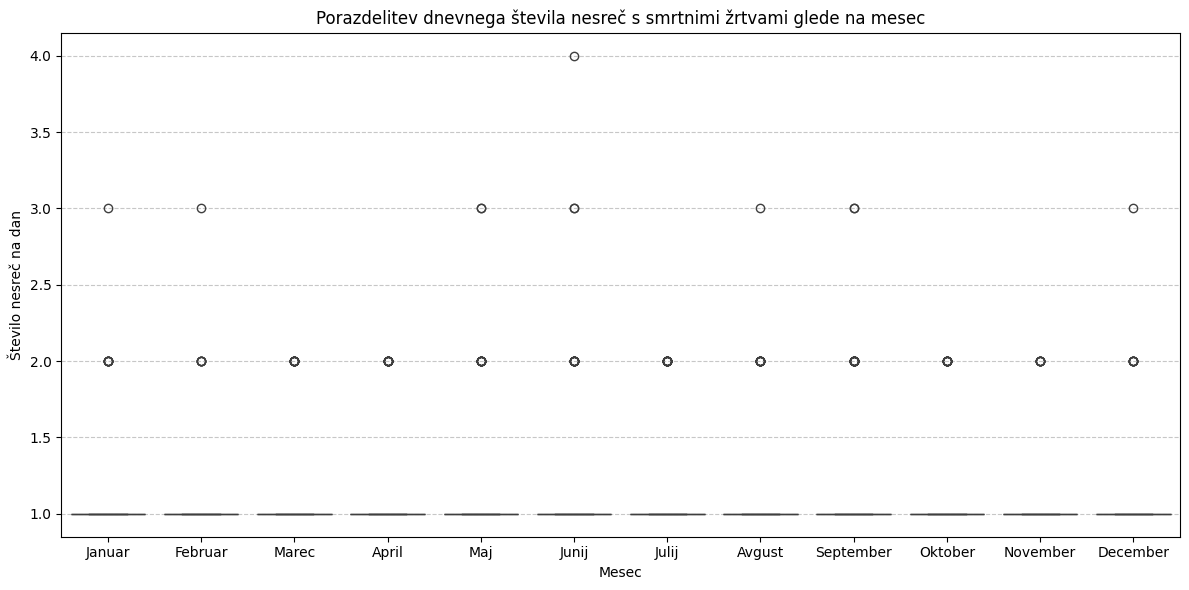

In [42]:
# BOXPLOT
mask_death = (data['Severity'] == 'death')
df_death = data[mask_death]

# Najprej grupiram in preštejem nesreče
grouped = df_death.groupby(['Datum', 'Mesec_SLO']).size()

# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')
# display(df_accidents)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Mesec_SLO', y='accident_count', order=month_order_slo)
plt.title('Porazdelitev dnevnega števila nesreč s smrtnimi žrtvami glede na mesec')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Prikaz števila vseh treh kategorij nesreč

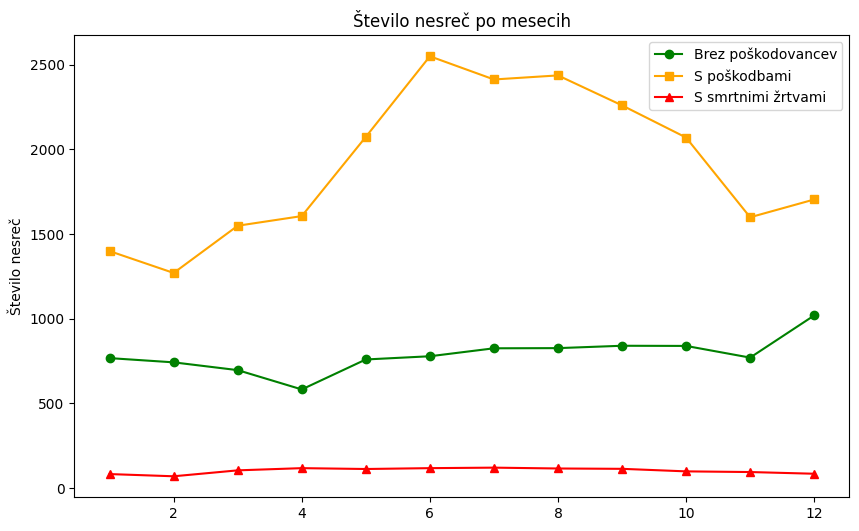

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_month.index, mild_accidents_per_month.values, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_month.index, injury_accidents_per_month.values, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_month.index, death_accidents_per_month.values, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.ylabel('Število nesreč')
plt.title('Število nesreč po mesecih')
plt.legend()

plt.show()

## Prikaz normaliziranih vrednosti za lažjo primerjavo

X_norm = (X - X_min) / (X_max - X_min)

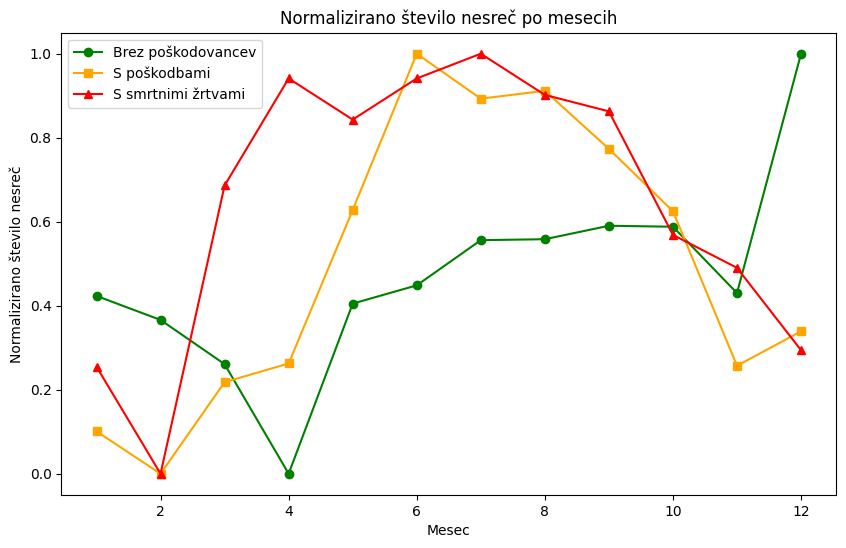

In [12]:
# Normaliziranje
mild_norm = (mild_accidents_per_month.values - np.min(mild_accidents_per_month.values)) / (np.max(mild_accidents_per_month.values) - np.min(mild_accidents_per_month.values))
injury_norm = (injury_accidents_per_month.values - np.min(injury_accidents_per_month.values)) / (np.max(injury_accidents_per_month.values) - np.min(injury_accidents_per_month.values))
death_norm = (death_accidents_per_month.values - np.min(death_accidents_per_month.values)) / (np.max(death_accidents_per_month.values) - np.min(death_accidents_per_month.values))

plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_month.index, mild_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_month.index, injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_month.index, death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.xlabel('Mesec')
plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč po mesecih')
plt.legend()

plt.show()

### Boxplot

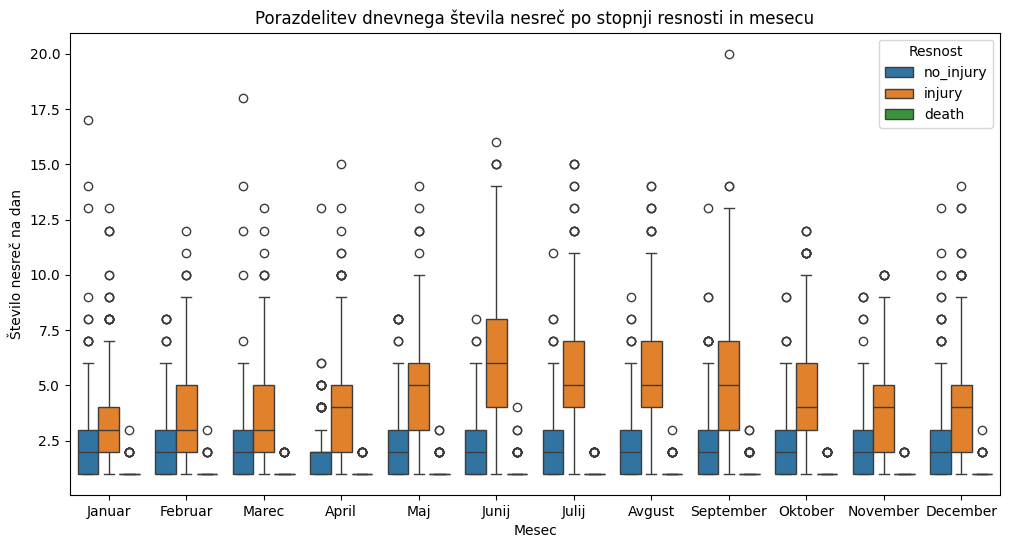

In [43]:
# Grupiraj in preštej število nesreč
grouped = data.groupby(['Datum', 'Mesec_SLO', 'Severity']).size()

# Rezultat grupiranja pretvori v dataframe in stolpec s preštetimi prometnimi nesrečami poimenuj 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Mesec_SLO', y='accident_count', hue='Severity', order=month_order_slo)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč na dan')
plt.title('Porazdelitev dnevnega števila nesreč po stopnji resnosti in mesecu')
plt.legend(title='Resnost')
plt.show()

### Heatmap

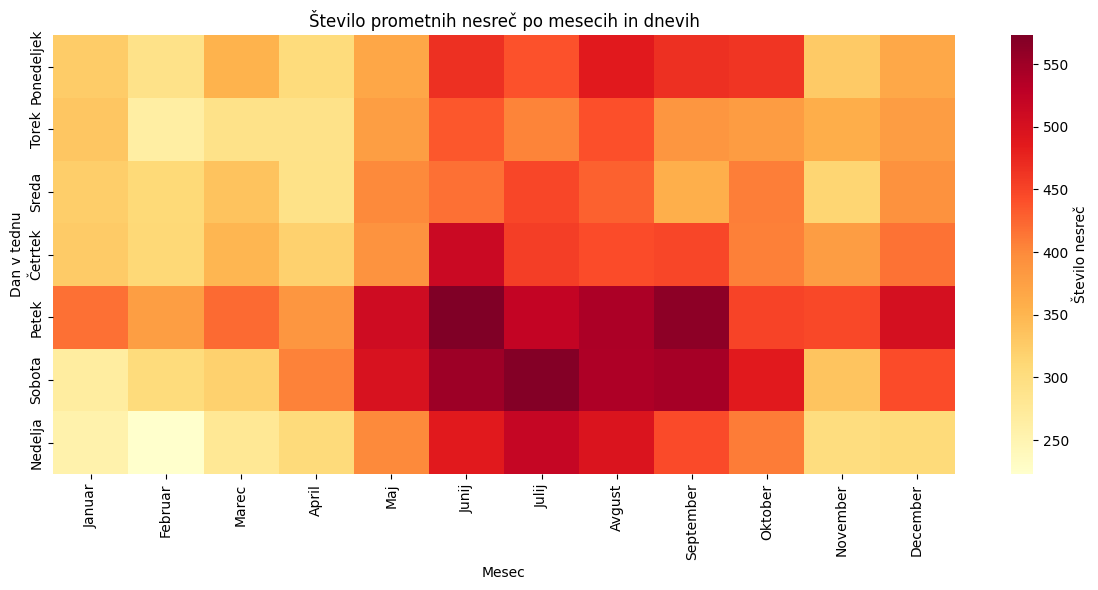

In [ ]:
grouped = data.groupby(['Mesec_SLO', 'Day_SLO']).size()
grouped = grouped.reset_index(name='accident_count')

# Mesece in dneve razporedi po vrstnem redu
cat_type_month = CategoricalDtype(categories=month_order_slo, ordered=True)
cat_type_day = CategoricalDtype(categories=day_order_slo, ordered=True)
grouped['Day_SLO'] = grouped['Day_SLO'].astype(cat_type_day)
grouped['Mesec_SLO'] = grouped['Mesec_SLO'].astype(cat_type_month) 
grouped = grouped.sort_values(['Mesec_SLO', 'Day_SLO'])

df_heatmap = grouped.pivot(index='Day_SLO', columns='Mesec_SLO', values='accident_count').fillna(0)
# display(df_heatmap)

# Heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(df_heatmap, 
            annot=False,
            cmap='YlOrRd',
            cbar_kws={'label': 'Število nesreč'})
plt.xlabel('Mesec')
plt.ylabel('Dan v tednu')
plt.title('Število prometnih nesreč po mesecih in dnevih')
plt.tight_layout()
plt.show()

## Petkove nesreče s smrtnim izidom

V skripti `01_analiza_po_dnevih` sem opazila, da so petkove prometne nesreče s smrtnim izidom porazdeljene čez relativno majhno število petkov. Zato sem se odločila, da pogledam, v katerem mesecu so zgoščeni ti smrtonosni petki. Moje predvidevanje je bilo, da je to najbrž julija ali avgusta, saj so takrat poletne počitnice.

In [13]:
# Za vsak vnos pridobi, kateri mesec je bil
data['weekday'] = data['NastanekDatumCas'].dt.weekday

fridays = data[data['weekday'] == 4]

# Nesreče s smrtnimi žrtvami
death_accidents_entries = fridays[(fridays['LjudjeMrtvi'] != 0)]

months_friday = death_accidents_entries['NastanekDatumCas'].dt.month

# Preštej število nesreč za vsak mesec
accidents_per_month_friday = months_friday.value_counts().sort_index()

#print(accidents_per_month_friday)

Text(0.5, 1.0, 'Število nesreč s smrtnimi žrtvami v petkih po mesecih')

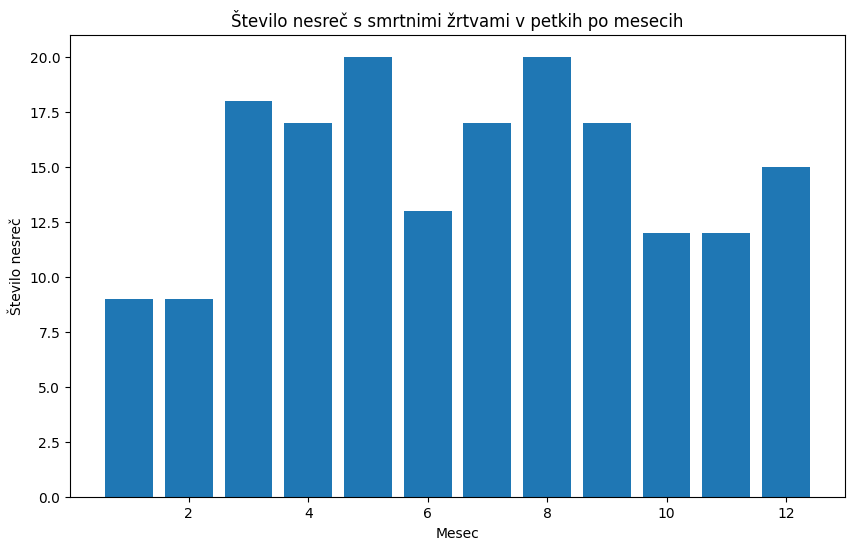

In [14]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_month_friday.index, accidents_per_month_friday.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnimi žrtvami v petkih po mesecih')

Moje predvidevanje je bilo napačno. Smrtonosni petki so zgoščeni v maju. Zanimivo. Nobena možna razlaga mi ne pade na pamet.